In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance_matrix

# Generate random cities

In [27]:
# Step 1: Generate Random Cities (nodes)
def generate_cities(num_cities, seed=42):
    """Generate random coordinates for cities."""
    np.random.seed(seed)
    return np.random.rand(num_cities, 2) * 100  # Generate coordinates in a 100x100 grid

### Plot all cities

[[37.45401188 95.07143064]
 [73.19939418 59.86584842]
 [15.60186404 15.59945203]
 [ 5.80836122 86.61761458]
 [60.11150117 70.80725778]
 [ 2.05844943 96.99098522]
 [83.24426408 21.23391107]
 [18.18249672 18.34045099]
 [30.4242243  52.47564316]
 [43.19450186 29.12291402]
 [61.18528947 13.94938607]
 [29.21446485 36.63618433]
 [45.60699842 78.51759614]
 [19.96737822 51.42344384]
 [59.24145689  4.64504127]
 [60.75448519 17.05241237]
 [ 6.5051593  94.88855373]
 [96.56320331 80.83973481]
 [30.46137692  9.7672114 ]
 [68.42330265 44.01524937]
 [12.20382348 49.51769101]
 [ 3.43885211 90.93204021]
 [25.87799816 66.25222844]
 [31.17110761 52.00680212]
 [54.67102793 18.48544555]
 [96.95846278 77.51328234]
 [93.94989416 89.48273504]
 [59.78999788 92.1874235 ]
 [ 8.84925021 19.59828624]
 [ 4.52272889 32.53303308]
 [38.86772897 27.13490318]
 [82.87375092 35.67533267]
 [28.09345097 54.26960832]
 [14.0924225  80.21969808]
 [ 7.45506437 98.68869366]
 [77.22447693 19.87156815]
 [ 0.55221171 81.54614285]
 

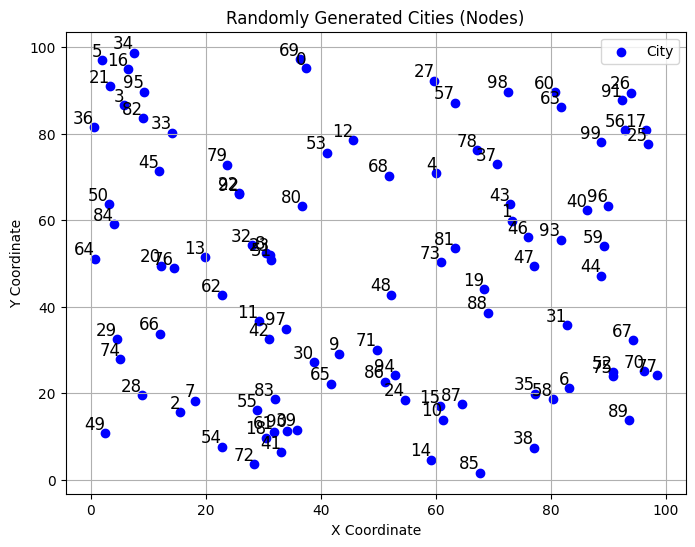

In [44]:
num_cities = 100  # Feel free to increase this for more complex instances
cities = generate_cities(num_cities)
print(cities)
# Step 2: Visualize the Cities
plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(cities):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')
plt.title("Randomly Generated Cities (Nodes)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

# Generate distance matrix

In [29]:
# Step 3: Compute Distance Matrix
dist_matrix = distance_matrix(cities, cities)

# Solving TSP heuristic method

In [41]:
def nearest_neighbor_tsp(dist_matrix, start_city=0):
    """
    Nearest Neighbor heuristic for solving the TSP.
    
    Parameters:
    - dist_matrix (numpy.ndarray): Distance matrix representing travel costs between cities.
    - start_city (int): Index of the starting city.
    
    Returns:
    - route (list): Order of cities visited.
    - total_distance (float): Total distance of the route.
    """
    num_cities = len(dist_matrix)
    visited = [False] * num_cities
    route = [start_city]
    total_distance = 0
    current_city = start_city
    visited[current_city] = True
    
    for _ in range(num_cities - 1):
        # Find the nearest unvisited city
        nearest_distance = float('inf')
        nearest_city = None
        for city in range(num_cities):
            if not visited[city] and dist_matrix[current_city, city] < nearest_distance:
                nearest_distance = dist_matrix[current_city, city]
                nearest_city = city
        
        # Move to the nearest city
        route.append(nearest_city)
        total_distance += nearest_distance
        current_city = nearest_city
        visited[current_city] = True
    
    # Return to the starting city
    total_distance += dist_matrix[current_city, start_city]
    route.append(start_city)
    
    return route, total_distance

### Print and plot TSP result

Route: [0, 69, 12, 53, 68, 4, 78, 37, 43, 1, 46, 93, 47, 19, 88, 31, 67, 70, 77, 75, 52, 6, 58, 35, 38, 85, 14, 10, 15, 87, 24, 86, 94, 71, 9, 30, 65, 83, 55, 61, 18, 90, 39, 41, 72, 54, 2, 7, 28, 74, 29, 66, 62, 11, 42, 97, 51, 23, 8, 32, 13, 76, 20, 64, 84, 50, 45, 33, 82, 3, 95, 16, 34, 5, 21, 36, 79, 22, 92, 80, 48, 73, 81, 40, 96, 59, 44, 99, 56, 17, 25, 91, 26, 63, 60, 98, 57, 27, 89, 49, 0]
Total Distance: 1006.40


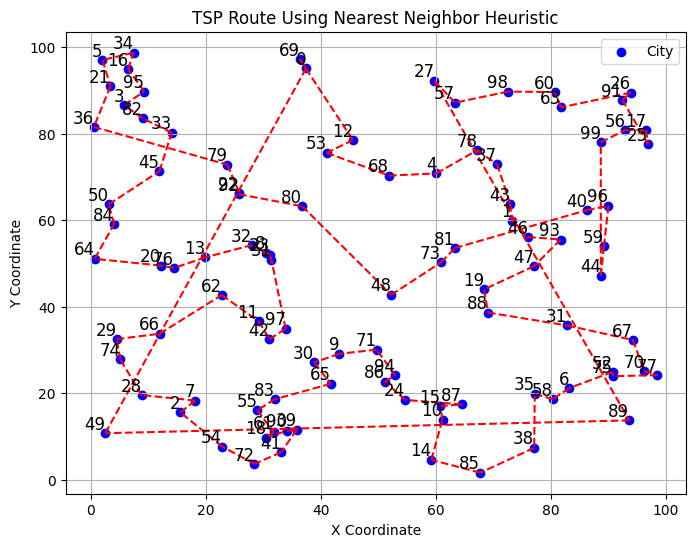

In [31]:
# Solve the TSP using the Nearest Neighbor heuristic
route, total_distance = nearest_neighbor_tsp(dist_matrix)

# Display the results
print(f"Route: {route}")
print(f"Total Distance: {total_distance:.2f}")

# Visualize the route
plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(cities):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

# Plot the route
for i in range(len(route) - 1):
    start, end = route[i], route[i + 1]
    plt.plot([cities[start, 0], cities[end, 0]], [cities[start, 1], cities[end, 1]], 'r--')


plt.title("TSP Route Using Nearest Neighbor Heuristic")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


# VRP test

Vehicle 1 route: [0, 69, 53, 80, 22, 92, 79, 45, 33, 82, 3, 95, 16, 34, 5, 21, 36, 50, 84, 64, 20, 76, 13, 32, 8, 23, 51, 62, 11, 42, 97, 30, 9, 83, 55, 61, 41, 54, 7, 74, 29, 48, 81, 40, 96, 25, 17, 26, 60, 57, 89, 0]
Vehicle 1 total distance: 634.6362077075987


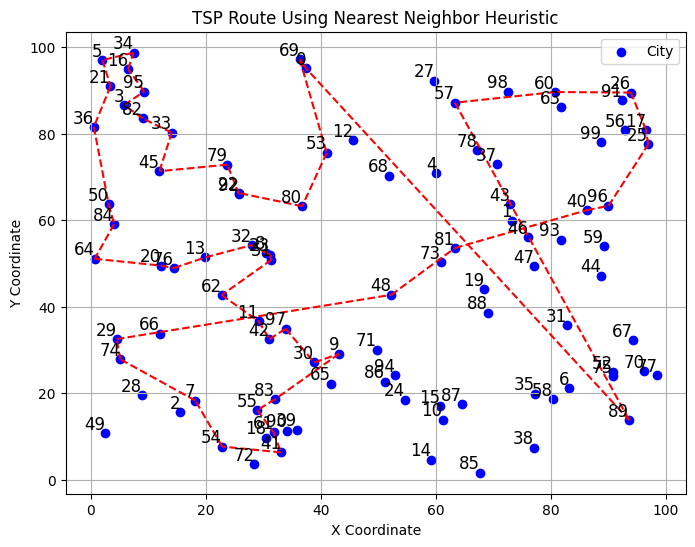

Vehicle 2 route: [0, 12, 68, 4, 78, 37, 43, 1, 46, 93, 47, 19, 88, 31, 67, 70, 77, 75, 52, 6, 58, 35, 38, 85, 14, 10, 15, 87, 24, 86, 94, 71, 65, 39, 90, 18, 72, 2, 28, 49, 66, 73, 44, 59, 99, 56, 91, 63, 98, 27, 0]
Vehicle 2 total distance: 506.4757657828978


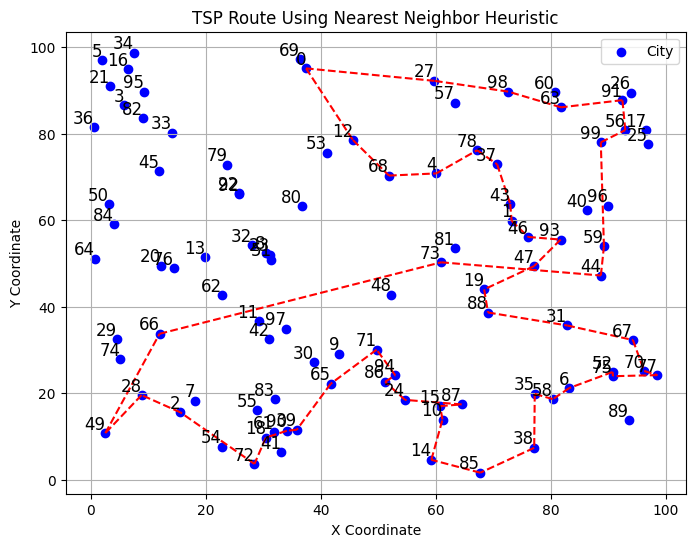

In [32]:
import numpy as np

def simultaneous_nearest_neighbor_vrp(dist_matrix, num_vehicles, start_city=0):
    """
    Nearest Neighbor heuristic for solving a VRP with simultaneous vehicle routes.
    
    Parameters:
    - dist_matrix (numpy.ndarray): Distance matrix representing travel costs between cities.
    - num_vehicles (int): Number of vehicles available.
    - start_city (int): Index of the depot (starting city for each vehicle).
    
    Returns:
    - routes (list of lists): List of routes for each vehicle.
    - total_distances (list of floats): Total distance of each vehicle's route.
    """
    num_cities = len(dist_matrix)
    visited = [False] * num_cities
    visited[start_city] = True  # Mark the depot as visited
    routes = [[start_city] for _ in range(num_vehicles)]
    total_distances = [0] * num_vehicles
    current_cities = [start_city] * num_vehicles  # Starting position for each vehicle
    
    while sum(visited) < num_cities:
        for vehicle in range(num_vehicles):
            nearest_distance = float('inf')
            nearest_city = None
            
            # Find the nearest unvisited city for this vehicle
            for city in range(num_cities):
                if not visited[city] and dist_matrix[current_cities[vehicle], city] < nearest_distance:
                    nearest_distance = dist_matrix[current_cities[vehicle], city]
                    nearest_city = city

            # If all cities are visited, stop this vehicle's search
            if nearest_city is None:
                continue
            
            # Move to the nearest city and update the route
            routes[vehicle].append(nearest_city)
            total_distances[vehicle] += nearest_distance
            current_cities[vehicle] = nearest_city
            visited[nearest_city] = True  # Mark the city as visited

    # Return to the starting city (depot) to complete each vehicle's route
    for vehicle in range(num_vehicles):
        total_distances[vehicle] += dist_matrix[current_cities[vehicle], start_city]
        routes[vehicle].append(start_city)

    return routes, total_distances



num_vehicles = 2
routes, total_distances = simultaneous_nearest_neighbor_vrp(dist_matrix, num_vehicles)
for i, route in enumerate(routes):
    print(f"Vehicle {i + 1} route: {route}")
    print(f"Vehicle {i + 1} total distance: {total_distances[i]}")

    # Visualize the route
    plt.figure(figsize=(8, 6))
    plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='City')
    for i, (x, y) in enumerate(cities):
        plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

    # Plot the route
    for i in range(len(route) - 1):
        start, end = route[i], route[i + 1]
        plt.plot([cities[start, 0], cities[end, 0]], [cities[start, 1], cities[end, 1]], 'r--')


    plt.title("TSP Route Using Nearest Neighbor Heuristic")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.show()

# Test Genetic Algorithm

A genetic algorithm takes random routes, select the best ones, do mutation on the best ones to create a new generation and then repeat the process again until having a good enough route.

In [33]:
import numpy as np
import random

def calculate_route_distance(route, dist_matrix):
    """Calculates the total distance for a given route."""
    distance = 0
    for i in range(len(route) - 1):
        distance += dist_matrix[route[i], route[i + 1]]
    return distance

def fitness_function(routes, dist_matrix, vehicle_capacity, demands):
    """Calculates the fitness of the solution, adding penalties if capacity is exceeded."""
    total_distance = 0
    penalty = 0
    for route in routes:
        route_distance = calculate_route_distance(route, dist_matrix)
        route_capacity = sum(demands[city] for city in route[1:-1])  # Ignore depot

        # Penalize if capacity constraint is violated
        #if route_capacity > vehicle_capacity:
        #    penalty += 1000 * (route_capacity - vehicle_capacity)
        
        total_distance += route_distance
    return total_distance + penalty


In [34]:
def initialize_population(num_customers, num_vehicles, dist_matrix, population_size=50):
    """Generates an initial population of random, feasible solutions."""
    population = []
    all_cities = list(range(1, num_customers))  # Exclude the depot (city 0)
    
    for _ in range(population_size):
        random.shuffle(all_cities)
        routes = [[] for _ in range(num_vehicles)]
        
        # Split cities among vehicles
        for i, city in enumerate(all_cities):
            routes[i % num_vehicles].append(city)

        # Each route starts and ends at the depot (city 0)
        routes = [[0] + route + [0] for route in routes]
        population.append(routes)

    return population


In [35]:
def tournament_selection(population, fitnesses, tournament_size=3):
    """Selects a solution from the population using tournament selection."""
    selected = random.sample(list(zip(population, fitnesses)), tournament_size)
    selected = min(selected, key=lambda x: x[1])  # Select the solution with the lowest fitness
    return selected[0]


In [36]:
def crossover(parent1, parent2):
    """Performs ordered crossover to generate a child solution."""
    child = [[] for _ in range(len(parent1))]
    for i, (route1, route2) in enumerate(zip(parent1, parent2)):
        # Choose a segment from route1 to keep
        start, end = sorted(random.sample(range(1, len(route1) - 1), 2))
        child[i] = route1[:start] + route1[start:end] + route1[end:]

        # Fill in remaining cities from route2
        for city in route2:
            if city not in child[i]:
                child[i].append(city)
        
        # Ensure child route starts and ends at depot
        child[i] = [0] + [city for city in child[i] if city != 0] + [0]

    return child


In [37]:
def mutate(route, mutation_rate=0.1):
    """Mutates a route by swapping cities within it."""
    for i in range(len(route)):
        if random.random() < mutation_rate:
            # Swap two random cities in the route (excluding the depot)
            idx1, idx2 = random.sample(range(1, len(route[i]) - 1), 2)
            route[i][idx1], route[i][idx2] = route[i][idx2], route[i][idx1]
    return route


In [38]:
def genetic_algorithm_vrp(dist_matrix, demands, vehicle_capacity, num_vehicles, num_generations=100, population_size=50, mutation_rate=0.1):
    """Genetic Algorithm for solving VRP."""
    num_customers = len(dist_matrix)
    population = initialize_population(num_customers, num_vehicles, dist_matrix, population_size)
    
    for generation in range(num_generations):
        # Evaluate fitness for the population
        fitnesses = [fitness_function(routes, dist_matrix, vehicle_capacity, demands) for routes in population]
        
        # Create a new population
        new_population = []
        
        # Keep the best individual (elitism)
        best_individual = min(population, key=lambda ind: fitness_function(ind, dist_matrix, vehicle_capacity, demands))
        new_population.append(best_individual)
        
        # Generate offspring
        while len(new_population) < population_size:
            # Select parents
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            
            # Crossover
            child = crossover(parent1, parent2)
            
            # Mutation
            child = mutate(child, mutation_rate)
            
            # Add child to the new population
            new_population.append(child)
        
        # Replace the old population with the new one
        population = new_population
        
        # Print best solution every 10 generations
        if generation % 10 == 0:
            best_fitness = min(fitnesses)
            print(f"Generation {generation}: Best Fitness = {best_fitness}")
    
    # Return the best solution found
    best_solution = min(population, key=lambda ind: fitness_function(ind, dist_matrix, vehicle_capacity, demands))
    best_distance = fitness_function(best_solution, dist_matrix, vehicle_capacity, demands)
    return best_solution, best_distance


In [39]:
import numpy as np

# Parameters
num_cities = 100  # Including the depot (city 0)
num_vehicles = 1
vehicle_capacity = 150

# Random seed for reproducibility
np.random.seed(42)

# Generate random coordinates for cities (assuming a 2D Euclidean space)
coordinates = np.random.rand(num_cities, 2) * 100  # Coordinates in a 100x100 grid

# Compute distance matrix using Euclidean distance
dist_matrix = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        dist_matrix[i, j] = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 + 
                                    (coordinates[i][1] - coordinates[j][1])**2)

# Generate random demands for each city, with the depot having a demand of 0
demands = [0] + list(np.random.randint(5, 20, size=num_cities - 1))


# Run the Genetic Algorithm
best_solution, best_distance = genetic_algorithm_vrp(
    dist_matrix=dist_matrix,
    demands=demands,
    vehicle_capacity=vehicle_capacity,
    num_vehicles=num_vehicles,
    num_generations=2000,  # Increase generations for a larger problem
    population_size=100,  # Increase population size
    mutation_rate=15    # Adjust mutation rate as needed
)

# Display best route and its distance
print("Best Solution (Routes for each vehicle):")
for idx, route in enumerate(best_solution):
    print(f"Vehicle {idx + 1}: {route}")
    # Visualize the route
    plt.figure(figsize=(8, 6))
    plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='City')
    for i, (x, y) in enumerate(cities):
        plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

    # Plot the route
    for i in range(len(route) - 1):
        start, end = route[i], route[i + 1]
        plt.plot([cities[start, 0], cities[end, 0]], [cities[start, 1], cities[end, 1]], 'r--')


    plt.title("TSP Route Using Nearest Neighbor Heuristic")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.show()

print("Best Total Distance:", best_distance)


Generation 0: Best Fitness = 4778.51323762658
Generation 10: Best Fitness = 4293.3664406933785
Generation 20: Best Fitness = 3963.423662271182
Generation 30: Best Fitness = 3662.2027654801827
Generation 40: Best Fitness = 3405.998865644488
Generation 50: Best Fitness = 3324.801314047979
Generation 60: Best Fitness = 3218.6071216102687
Generation 70: Best Fitness = 3112.6009282162836
Generation 80: Best Fitness = 3071.6736012675105
Generation 90: Best Fitness = 2993.581422705516
Generation 100: Best Fitness = 2892.1272283035787
Generation 110: Best Fitness = 2781.6302057887224
Generation 120: Best Fitness = 2689.273817880321
Generation 130: Best Fitness = 2668.758414876041
Generation 140: Best Fitness = 2667.55211184735
Generation 150: Best Fitness = 2663.4858503924092
Generation 160: Best Fitness = 2623.4236407809367
Generation 170: Best Fitness = 2560.0946833437456
Generation 180: Best Fitness = 2518.793931356266
Generation 190: Best Fitness = 2502.534333347465
Generation 200: Best Fi

KeyboardInterrupt: 

# Gen algo but by myself

Generation 0: Best Distance = 1141.1119734904964
Generation 1: Best Distance = 1141.1119734904964
Generation 2: Best Distance = 1141.1119734904964
Generation 3: Best Distance = 1141.1119734904964
Generation 4: Best Distance = 1141.1119734904964
Generation 5: Best Distance = 1141.1119734904964
Generation 6: Best Distance = 1141.1119734904964
Generation 7: Best Distance = 1141.1119734904964
Generation 8: Best Distance = 1141.1119734904964
Generation 9: Best Distance = 1141.1119734904964
Generation 10: Best Distance = 1141.1119734904964
Generation 11: Best Distance = 1141.1119734904964
Generation 12: Best Distance = 1141.1119734904964
Generation 13: Best Distance = 1141.1119734904964
Generation 14: Best Distance = 1141.1119734904964
Generation 15: Best Distance = 1141.1119734904964
Generation 16: Best Distance = 1141.1119734904964
Generation 17: Best Distance = 1141.1119734904964
Generation 18: Best Distance = 1141.1119734904964
Generation 19: Best Distance = 1141.1119734904964
Generation

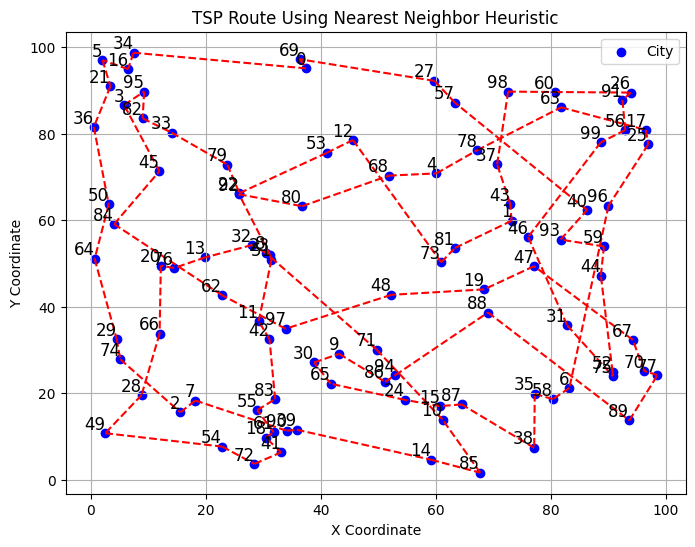

In [ ]:
def calculate_route_distance(route, dist_matrix):
    """Calculates the total distance for a given route."""
    distance = 0
    for i in range(len(route) - 1):
        distance += dist_matrix[route[i], route[i + 1]]
    return distance

def best_of_generation(population, dist_matrix):
    """
    Finds the best solution from the population by calculating the total distance
    for each solution (set of routes) and returning the one with the shortest distance.
    
    Parameters:
    - population (list): List of solutions, each solution is a list of routes for each vehicle.
    - dist_matrix (numpy.ndarray): Distance matrix representing travel costs between cities.
    
    Returns:
    - best_solution (list): The solution with the shortest total distance.
    - best_distance (float): The total distance of the best solution.
    """
    best_solution = None
    best_distance = float('inf')
    
    for routes in population:
        # Calculate total distance for the current solution (all routes)
        total_distance = sum(calculate_route_distance(route, dist_matrix) for route in routes)
        
        # Update best solution if the current solution is better
        if total_distance < best_distance:
            best_distance = total_distance
            best_solution = routes
            
    return best_solution, best_distance

def mutate(route, mutation_rate=0.1):
    """
    Mutates a set of routes by swapping cities within each route with a certain probability.
    
    Parameters:
    - routes (list of lists): List of routes (each route is a list of city indices).
    - mutation_rate (float): Probability of applying mutation to a route.
    
    Returns:
    - routes (list of lists): Mutated routes.
    """
    # Apply mutation based on mutation rate
    if random.random() < mutation_rate and len(route) > 3:  # Ensure there are at least two cities to swap (excluding depot)
        # Swap two random cities in the route, excluding the depot
        idx1, idx2 = random.sample(range(1, len(route) - 1), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
    
    return routes


def generate_new_generation(route,distance_matrix,population_size):
    new_population = []
    for i in range(population_size):
        new_route = mutate(route)
        new_population.append(new_route)
    return new_population


def gen_algo_VRP(dist_matrix, num_generations=100, population_size=50, mutation_rate=0.1):
    origin_route = nearest_neighbor_tsp(dist_matrix)
    population = []
    population = generate_new_generation(origin_route,dist_matrix,population_size)
    for generation in range(num_generations):
        new_origin_route, best_distance = best_of_generation(population, dist_matrix)
        population = generate_new_generation(new_origin_route,dist_matrix,population_size)
        print(f"Generation {generation}: Best Distance = {best_distance}")
    return best_of_generation(population, dist_matrix)


best_route, best_distance = gen_algo_VRP(dist_matrix)

# Visualize the route
plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(cities):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

# Plot the route
for i in range(len(route) - 1):
    start, end = route[i], route[i + 1]
    plt.plot([cities[start, 0], cities[end, 0]], [cities[start, 1], cities[end, 1]], 'r--')


plt.title("TSP Route Using Genetic Metaheuristic")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


# Solomon data usage

In [ ]:
file_path = 'data.txt'

# Initialize lists to store vehicle and customer data
vehicle_data = []
customer_data = []

# Read data line by line
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    # Parse vehicle data
    vehicle_info_start = lines.index('VEHICLE\n') + 2
    vehicle_info_end = lines.index('CUSTOMER\n')
    vehicle_line = lines[vehicle_info_start].strip().split()
    
    # Store vehicle data as a dictionary in a list
    vehicle_data.append({
        'NUMBER': int(vehicle_line[0]),
        'CAPACITY': int(vehicle_line[1])
    })
    
    # Parse customer data
    customer_info_start = vehicle_info_end + 2
    for line in lines[customer_info_start:]:
        if line.strip():  # Skip any empty lines
            parts = line.strip().split()
            customer_data.append({
                'CUST_NO': int(parts[0]),
                'XCOORD': int(parts[1]),
                'YCOORD': int(parts[2]),
                'DEMAND': int(parts[3]),
                'READY_TIME': int(parts[4]),
                'DUE_DATE': int(parts[5]),
                'SERVICE_TIME': int(parts[6])
            })

# Display the parsed data
print("Vehicle Data:")
print(vehicle_data)
print("\nCustomer Data:")
for customer in customer_data:  # Show first 5 customers for brevity
    print(customer)


Vehicle Data:
[{'NUMBER': 25, 'CAPACITY': 200}]

Customer Data:
{'CUST_NO': 0, 'XCOORD': 40, 'YCOORD': 50, 'DEMAND': 0, 'READY_TIME': 0, 'DUE_DATE': 1236, 'SERVICE_TIME': 0}
{'CUST_NO': 1, 'XCOORD': 45, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 912, 'DUE_DATE': 967, 'SERVICE_TIME': 90}
{'CUST_NO': 2, 'XCOORD': 45, 'YCOORD': 70, 'DEMAND': 30, 'READY_TIME': 825, 'DUE_DATE': 870, 'SERVICE_TIME': 90}
{'CUST_NO': 3, 'XCOORD': 42, 'YCOORD': 66, 'DEMAND': 10, 'READY_TIME': 65, 'DUE_DATE': 146, 'SERVICE_TIME': 90}
{'CUST_NO': 4, 'XCOORD': 42, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 727, 'DUE_DATE': 782, 'SERVICE_TIME': 90}
{'CUST_NO': 5, 'XCOORD': 42, 'YCOORD': 65, 'DEMAND': 10, 'READY_TIME': 15, 'DUE_DATE': 67, 'SERVICE_TIME': 90}
{'CUST_NO': 6, 'XCOORD': 40, 'YCOORD': 69, 'DEMAND': 20, 'READY_TIME': 621, 'DUE_DATE': 702, 'SERVICE_TIME': 90}
{'CUST_NO': 7, 'XCOORD': 40, 'YCOORD': 66, 'DEMAND': 20, 'READY_TIME': 170, 'DUE_DATE': 225, 'SERVICE_TIME': 90}
{'CUST_NO': 8, 'XCOORD': 38, 'YCOORD':

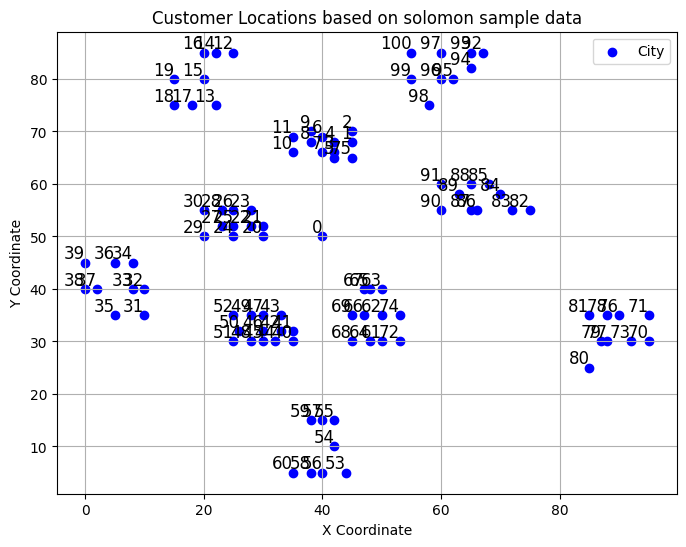

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
customer_locations = np.array([(customer['XCOORD'], customer['YCOORD']) for customer in customer_data])

# Step 2: Visualize the Cities
plt.figure(figsize=(8, 6))
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')
plt.title("Customer Locations based on solomon sample data")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

Route: [0, 20, 21, 22, 23, 26, 28, 27, 25, 24, 29, 30, 34, 36, 39, 38, 37, 35, 31, 32, 33, 52, 49, 47, 43, 42, 41, 40, 44, 45, 46, 48, 50, 51, 59, 57, 55, 54, 53, 56, 58, 60, 68, 64, 61, 72, 74, 62, 66, 69, 67, 65, 63, 90, 89, 88, 85, 84, 83, 82, 86, 87, 91, 98, 96, 95, 94, 93, 92, 97, 100, 99, 2, 1, 4, 3, 5, 7, 8, 9, 6, 11, 10, 75, 13, 17, 18, 19, 15, 16, 14, 12, 81, 78, 76, 71, 70, 73, 77, 79, 80, 0]
Total Distance: 596.88


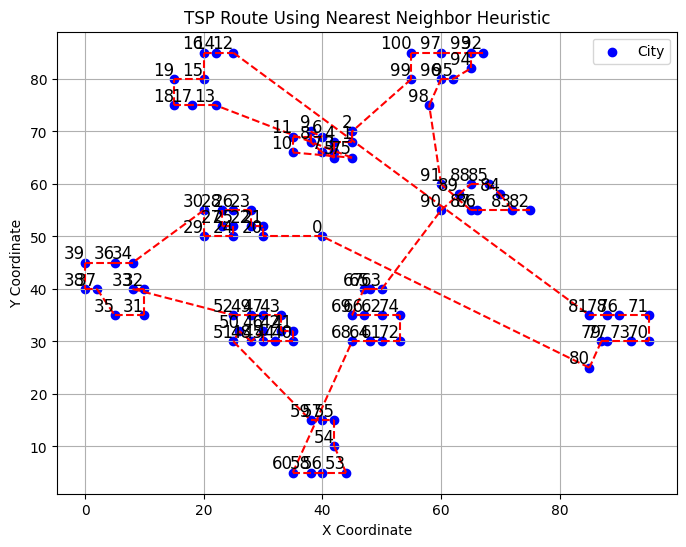

In [48]:
# Solve the TSP using the Nearest Neighbor heuristic
route, total_distance = nearest_neighbor_tsp(distance_matrix(customer_locations, customer_locations))

# Display the results
print(f"Route: {route}")
print(f"Total Distance: {total_distance:.2f}")

# Visualize the route
plt.figure(figsize=(8, 6))
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

# Plot the route
for i in range(len(route) - 1):
    start, end = route[i], route[i + 1]
    plt.plot([customer_locations[start, 0], customer_locations[end, 0]], [customer_locations[start, 1], customer_locations[end, 1]], 'r--')


plt.title("TSP Route Using Nearest Neighbor Heuristic")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()
